In [1]:
#1. Import libraries
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import keras

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_SCS_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,59960,59960,59920,59960,34010
1,2019-03-04,59960,60080,58980,59960,8580
2,2019-03-05,58720,60010,58720,59960,35720
3,2019-03-06,59960,60130,59960,59960,9290
4,2019-03-07,59960,60400,59960,60330,19290
...,...,...,...,...,...,...
1248,2024-02-23,75000,75400,73600,73800,91600
1249,2024-02-26,74000,75500,73800,75400,95900
1250,2024-02-27,75400,76000,74000,74700,39400
1251,2024-02-28,74500,75700,74500,75500,63500


In [3]:
#3. Scaler data for RNN model
data_rnn=data.reset_index()['close']
scaler=MinMaxScaler(feature_range=(0,1))
data_rnn=scaler.fit_transform(np.array(data_rnn).reshape(-1,1))

In [4]:
#4. Split the data into train and test sets
train_size = int(0.7 * len(data_rnn))
test_size = len(data_rnn) - train_size
train_rnn = data_rnn[:train_size]
test_rnn = data_rnn[train_size:]

In [5]:
#5. Function to create a dataset for RNN model
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 [samples, time steps, features] and Y=t+100 [samples]
time_step = 100
x_train_rnn, y_train_rnn = create_dataset(train_rnn, time_step)
x_test_rnn, y_test_rnn = create_dataset(test_rnn, time_step)
x_train_rnn =x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1] , 1)
x_test_rnn = x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1] , 1)

In [7]:
#7. Proceed to define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, return_sequences=True, input_shape=(time_step, 1)))
model_rnn.add(Dropout(0.5))  
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\THAI NGOC DUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#8. Fit model with train data
model_rnn.fit(x_train_rnn,y_train_rnn,validation_data=(x_test_rnn,y_test_rnn),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.5019 - val_loss: 0.0248
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1635 - val_loss: 0.0066
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0794 - val_loss: 0.0035
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0643 - val_loss: 4.7435e-04
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0493 - val_loss: 0.0092
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0461 - val_loss: 5.0997e-04
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0320 - val_loss: 0.0010
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0293 - val_loss: 0.0030
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0259 - val_loss: 8.1163e-04
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0225 - val_loss: 5.5907e-04
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0230 - val_loss: 0.0021
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/

In [9]:
#9. Predict on the test data, then perform data normalization
pred_test_rnn=model_rnn.predict(x_test_rnn)
pred_test_rnn=scaler.inverse_transform(pred_test_rnn)
check_pred_test_rnn=scaler.inverse_transform(test_rnn)[(time_step+1):]

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


In [10]:
#10. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(pred_test_rnn,check_pred_test_rnn))
mape = mean_absolute_percentage_error(pred_test_rnn,check_pred_test_rnn) * 100
msle = mean_squared_log_error(pred_test_rnn,check_pred_test_rnn)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 1082.677473748263
MAPE: 1.1372929349474654 %
MSLE: 0.00026795976181037066


In [11]:
#11. Predict close prices for the next 30, 60, 90 days
x_input=test_rnn[-(time_step+1):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=time_step
i=0
while(i<90):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.57920998 0.58731809 0.5954262  0.5975052  0.5975052  0.60561331
 0.60561331 0.58939709 0.5975052  0.5975052  0.61351351 0.61164241
 0.5954262  0.59147609 0.58523909 0.56923077 0.54282744 0.52079002
 0.51268191 0.49438669 0.5045738  0.4964657  0.52266112 0.5045738
 0.52681913 0.52681913 0.51871102 0.51871102 0.52681913 0.54282744
 0.54906445 0.54490644 0.54490644 0.53492723 0.54490644 0.54095634
 0.55093555 0.53284823 0.53492723 0.55093555 0.54095634 0.54095634
 0.54095634 0.54095634 0.54095634 0.53887734 0.54698545 0.55301455
 0.54906445 0.54095634 0.53679834 0.55696466 0.55696466 0.55696466
 0.56713098 0.56923077 0.55696466 0.55301455 0.55093555 0.57523909
 0.58731809 0.67629938 0.63783784 0.65862786 0.62952183 0.62328482
 0.60873181 0.61081081 0.6004158  0.6004158  0.59002079 0.59209979
 0.5983368  0.5962578  0.5962578  0.6024948  0.57130977 0.56713098
 0.56299376 0.56507277 0.6004158  0.58794179 0.58794179 0.66694387
 0.71268191 0.6960499  0.69189189 0.71060291 0.7230

8 day output [[0.7926207]]
9 day input [0.5975052  0.61351351 0.61164241 0.5954262  0.59147609 0.58523909
 0.56923077 0.54282744 0.52079002 0.51268191 0.49438669 0.5045738
 0.4964657  0.52266112 0.5045738  0.52681913 0.52681913 0.51871102
 0.51871102 0.52681913 0.54282744 0.54906445 0.54490644 0.54490644
 0.53492723 0.54490644 0.54095634 0.55093555 0.53284823 0.53492723
 0.55093555 0.54095634 0.54095634 0.54095634 0.54095634 0.54095634
 0.53887734 0.54698545 0.55301455 0.54906445 0.54095634 0.53679834
 0.55696466 0.55696466 0.55696466 0.56713098 0.56923077 0.55696466
 0.55301455 0.55093555 0.57523909 0.58731809 0.67629938 0.63783784
 0.65862786 0.62952183 0.62328482 0.60873181 0.61081081 0.6004158
 0.6004158  0.59002079 0.59209979 0.5983368  0.5962578  0.5962578
 0.6024948  0.57130977 0.56713098 0.56299376 0.56507277 0.6004158
 0.58794179 0.58794179 0.66694387 0.71268191 0.6960499  0.69189189
 0.71060291 0.72307692 0.72515593 0.72099792 0.72723493 0.74178794
 0.78336798 0.78336798 0.75

17 day output [[0.7937519]]
18 day input [0.51268191 0.49438669 0.5045738  0.4964657  0.52266112 0.5045738
 0.52681913 0.52681913 0.51871102 0.51871102 0.52681913 0.54282744
 0.54906445 0.54490644 0.54490644 0.53492723 0.54490644 0.54095634
 0.55093555 0.53284823 0.53492723 0.55093555 0.54095634 0.54095634
 0.54095634 0.54095634 0.54095634 0.53887734 0.54698545 0.55301455
 0.54906445 0.54095634 0.53679834 0.55696466 0.55696466 0.55696466
 0.56713098 0.56923077 0.55696466 0.55301455 0.55093555 0.57523909
 0.58731809 0.67629938 0.63783784 0.65862786 0.62952183 0.62328482
 0.60873181 0.61081081 0.6004158  0.6004158  0.59002079 0.59209979
 0.5983368  0.5962578  0.5962578  0.6024948  0.57130977 0.56713098
 0.56299376 0.56507277 0.6004158  0.58794179 0.58794179 0.66694387
 0.71268191 0.6960499  0.69189189 0.71060291 0.72307692 0.72515593
 0.72099792 0.72723493 0.74178794 0.78336798 0.78336798 0.75841996
 0.79168399 0.77713098 0.79376299 0.78544699 0.79515278 0.79445648
 0.79593831 0.794267  

25 day output [[0.7953989]]
26 day input [0.51871102 0.51871102 0.52681913 0.54282744 0.54906445 0.54490644
 0.54490644 0.53492723 0.54490644 0.54095634 0.55093555 0.53284823
 0.53492723 0.55093555 0.54095634 0.54095634 0.54095634 0.54095634
 0.54095634 0.53887734 0.54698545 0.55301455 0.54906445 0.54095634
 0.53679834 0.55696466 0.55696466 0.55696466 0.56713098 0.56923077
 0.55696466 0.55301455 0.55093555 0.57523909 0.58731809 0.67629938
 0.63783784 0.65862786 0.62952183 0.62328482 0.60873181 0.61081081
 0.6004158  0.6004158  0.59002079 0.59209979 0.5983368  0.5962578
 0.5962578  0.6024948  0.57130977 0.56713098 0.56299376 0.56507277
 0.6004158  0.58794179 0.58794179 0.66694387 0.71268191 0.6960499
 0.69189189 0.71060291 0.72307692 0.72515593 0.72099792 0.72723493
 0.74178794 0.78336798 0.78336798 0.75841996 0.79168399 0.77713098
 0.79376299 0.78544699 0.79515278 0.79445648 0.79593831 0.794267
 0.79679841 0.7992267  0.79593432 0.7937851  0.79262072 0.79528558
 0.7959947  0.79448944 0.

34 day output [[0.79419595]]
35 day input [0.54095634 0.55093555 0.53284823 0.53492723 0.55093555 0.54095634
 0.54095634 0.54095634 0.54095634 0.54095634 0.53887734 0.54698545
 0.55301455 0.54906445 0.54095634 0.53679834 0.55696466 0.55696466
 0.55696466 0.56713098 0.56923077 0.55696466 0.55301455 0.55093555
 0.57523909 0.58731809 0.67629938 0.63783784 0.65862786 0.62952183
 0.62328482 0.60873181 0.61081081 0.6004158  0.6004158  0.59002079
 0.59209979 0.5983368  0.5962578  0.5962578  0.6024948  0.57130977
 0.56713098 0.56299376 0.56507277 0.6004158  0.58794179 0.58794179
 0.66694387 0.71268191 0.6960499  0.69189189 0.71060291 0.72307692
 0.72515593 0.72099792 0.72723493 0.74178794 0.78336798 0.78336798
 0.75841996 0.79168399 0.77713098 0.79376299 0.78544699 0.79515278
 0.79445648 0.79593831 0.794267   0.79679841 0.7992267  0.79593432
 0.7937851  0.79262072 0.79528558 0.7959947  0.79448944 0.79136133
 0.7939809  0.79435325 0.79632246 0.79255366 0.7937519  0.79394263
 0.79449171 0.791916

42 day output [[0.79439014]]
43 day input [0.54095634 0.54095634 0.53887734 0.54698545 0.55301455 0.54906445
 0.54095634 0.53679834 0.55696466 0.55696466 0.55696466 0.56713098
 0.56923077 0.55696466 0.55301455 0.55093555 0.57523909 0.58731809
 0.67629938 0.63783784 0.65862786 0.62952183 0.62328482 0.60873181
 0.61081081 0.6004158  0.6004158  0.59002079 0.59209979 0.5983368
 0.5962578  0.5962578  0.6024948  0.57130977 0.56713098 0.56299376
 0.56507277 0.6004158  0.58794179 0.58794179 0.66694387 0.71268191
 0.6960499  0.69189189 0.71060291 0.72307692 0.72515593 0.72099792
 0.72723493 0.74178794 0.78336798 0.78336798 0.75841996 0.79168399
 0.77713098 0.79376299 0.78544699 0.79515278 0.79445648 0.79593831
 0.794267   0.79679841 0.7992267  0.79593432 0.7937851  0.79262072
 0.79528558 0.7959947  0.79448944 0.79136133 0.7939809  0.79435325
 0.79632246 0.79255366 0.7937519  0.79394263 0.79449171 0.79191637
 0.79232562 0.79395407 0.7964859  0.79357862 0.79539889 0.79512697
 0.797077   0.7960153

50 day output [[0.79505056]]
51 day input [0.55696466 0.55696466 0.55696466 0.56713098 0.56923077 0.55696466
 0.55301455 0.55093555 0.57523909 0.58731809 0.67629938 0.63783784
 0.65862786 0.62952183 0.62328482 0.60873181 0.61081081 0.6004158
 0.6004158  0.59002079 0.59209979 0.5983368  0.5962578  0.5962578
 0.6024948  0.57130977 0.56713098 0.56299376 0.56507277 0.6004158
 0.58794179 0.58794179 0.66694387 0.71268191 0.6960499  0.69189189
 0.71060291 0.72307692 0.72515593 0.72099792 0.72723493 0.74178794
 0.78336798 0.78336798 0.75841996 0.79168399 0.77713098 0.79376299
 0.78544699 0.79515278 0.79445648 0.79593831 0.794267   0.79679841
 0.7992267  0.79593432 0.7937851  0.79262072 0.79528558 0.7959947
 0.79448944 0.79136133 0.7939809  0.79435325 0.79632246 0.79255366
 0.7937519  0.79394263 0.79449171 0.79191637 0.79232562 0.79395407
 0.7964859  0.79357862 0.79539889 0.79512697 0.797077   0.79601538
 0.79656398 0.79454392 0.79585254 0.79532671 0.7970916  0.79419595
 0.79562873 0.79410017 0

60 day output [[0.79514295]]
61 day input [0.67629938 0.63783784 0.65862786 0.62952183 0.62328482 0.60873181
 0.61081081 0.6004158  0.6004158  0.59002079 0.59209979 0.5983368
 0.5962578  0.5962578  0.6024948  0.57130977 0.56713098 0.56299376
 0.56507277 0.6004158  0.58794179 0.58794179 0.66694387 0.71268191
 0.6960499  0.69189189 0.71060291 0.72307692 0.72515593 0.72099792
 0.72723493 0.74178794 0.78336798 0.78336798 0.75841996 0.79168399
 0.77713098 0.79376299 0.78544699 0.79515278 0.79445648 0.79593831
 0.794267   0.79679841 0.7992267  0.79593432 0.7937851  0.79262072
 0.79528558 0.7959947  0.79448944 0.79136133 0.7939809  0.79435325
 0.79632246 0.79255366 0.7937519  0.79394263 0.79449171 0.79191637
 0.79232562 0.79395407 0.7964859  0.79357862 0.79539889 0.79512697
 0.797077   0.79601538 0.79656398 0.79454392 0.79585254 0.79532671
 0.7970916  0.79419595 0.79562873 0.79410017 0.7970432  0.79460436
 0.79456276 0.79337794 0.79397619 0.79439014 0.7949788  0.79337549
 0.79380435 0.7958873

68 day output [[0.79371893]]
69 day input [0.6004158  0.59002079 0.59209979 0.5983368  0.5962578  0.5962578
 0.6024948  0.57130977 0.56713098 0.56299376 0.56507277 0.6004158
 0.58794179 0.58794179 0.66694387 0.71268191 0.6960499  0.69189189
 0.71060291 0.72307692 0.72515593 0.72099792 0.72723493 0.74178794
 0.78336798 0.78336798 0.75841996 0.79168399 0.77713098 0.79376299
 0.78544699 0.79515278 0.79445648 0.79593831 0.794267   0.79679841
 0.7992267  0.79593432 0.7937851  0.79262072 0.79528558 0.7959947
 0.79448944 0.79136133 0.7939809  0.79435325 0.79632246 0.79255366
 0.7937519  0.79394263 0.79449171 0.79191637 0.79232562 0.79395407
 0.7964859  0.79357862 0.79539889 0.79512697 0.797077   0.79601538
 0.79656398 0.79454392 0.79585254 0.79532671 0.7970916  0.79419595
 0.79562873 0.79410017 0.7970432  0.79460436 0.79456276 0.79337794
 0.79397619 0.79439014 0.7949788  0.79337549 0.79380435 0.79588735
 0.79482204 0.79447293 0.79504246 0.79505056 0.79506445 0.79546869
 0.79504472 0.79551113 

78 day output [[0.7943192]]
79 day input [0.56507277 0.6004158  0.58794179 0.58794179 0.66694387 0.71268191
 0.6960499  0.69189189 0.71060291 0.72307692 0.72515593 0.72099792
 0.72723493 0.74178794 0.78336798 0.78336798 0.75841996 0.79168399
 0.77713098 0.79376299 0.78544699 0.79515278 0.79445648 0.79593831
 0.794267   0.79679841 0.7992267  0.79593432 0.7937851  0.79262072
 0.79528558 0.7959947  0.79448944 0.79136133 0.7939809  0.79435325
 0.79632246 0.79255366 0.7937519  0.79394263 0.79449171 0.79191637
 0.79232562 0.79395407 0.7964859  0.79357862 0.79539889 0.79512697
 0.797077   0.79601538 0.79656398 0.79454392 0.79585254 0.79532671
 0.7970916  0.79419595 0.79562873 0.79410017 0.7970432  0.79460436
 0.79456276 0.79337794 0.79397619 0.79439014 0.7949788  0.79337549
 0.79380435 0.79588735 0.79482204 0.79447293 0.79504246 0.79505056
 0.79506445 0.79546869 0.79504472 0.79551113 0.79625428 0.79568458
 0.79522061 0.79543692 0.79469085 0.79514295 0.79455167 0.79447615
 0.79341245 0.7942024

87 day output [[0.7934353]]
88 day input [0.72307692 0.72515593 0.72099792 0.72723493 0.74178794 0.78336798
 0.78336798 0.75841996 0.79168399 0.77713098 0.79376299 0.78544699
 0.79515278 0.79445648 0.79593831 0.794267   0.79679841 0.7992267
 0.79593432 0.7937851  0.79262072 0.79528558 0.7959947  0.79448944
 0.79136133 0.7939809  0.79435325 0.79632246 0.79255366 0.7937519
 0.79394263 0.79449171 0.79191637 0.79232562 0.79395407 0.7964859
 0.79357862 0.79539889 0.79512697 0.797077   0.79601538 0.79656398
 0.79454392 0.79585254 0.79532671 0.7970916  0.79419595 0.79562873
 0.79410017 0.7970432  0.79460436 0.79456276 0.79337794 0.79397619
 0.79439014 0.7949788  0.79337549 0.79380435 0.79588735 0.79482204
 0.79447293 0.79504246 0.79505056 0.79506445 0.79546869 0.79504472
 0.79551113 0.79625428 0.79568458 0.79522061 0.79543692 0.79469085
 0.79514295 0.79455167 0.79447615 0.79341245 0.79420245 0.79436868
 0.79409188 0.7938959  0.79371893 0.79330009 0.79428923 0.79383868
 0.79356676 0.79307359 0

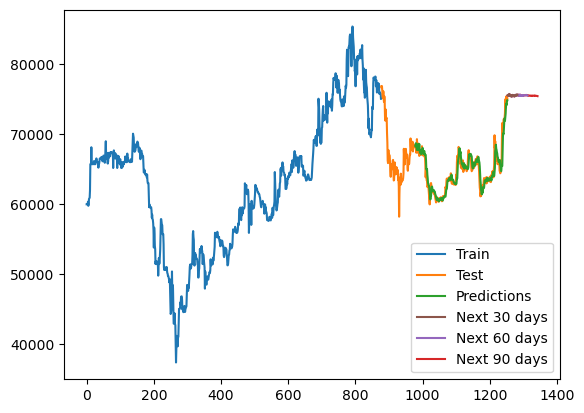

In [12]:
#12. Draw the plot
train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_index, scaler.inverse_transform(train_rnn), label="Train")

test_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
line2, = plt.plot(test_index, scaler.inverse_transform(test_rnn), label="Test")

pred_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
line3, = plt.plot(pred_index, pred_test_rnn, label="Predictions")

pred90_index = pd.RangeIndex(start=len(data), stop=len(data) + 90, step=1)
line4, = plt.plot(pred90_index, scaler.inverse_transform(lst_output), label="Next 90 days")

pred60_index = pd.RangeIndex(start=len(data), stop=len(data) + 60, step=1)
line5, = plt.plot(pred60_index, scaler.inverse_transform(lst_output[:60]), label="Next 60 days")

pred30_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
line6, = plt.plot(pred30_index, scaler.inverse_transform(lst_output[:30]), label="Next 30 days")

plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\RNN_SCS_73.png")
plt.show()